# Week 8?: Walk 

Hello All, 

Today we are going to be analyzing whole-cell patch clamp electrophysiology data. 

A bit of background.. 
    Im currently examining the effects of chronic morphine exposure on the ability for paraventricular nucleus of the thalamus (PVT)    to fire action potentials. 
    
    Experimentally, im probing this by holding cells in a Current-Clamped configuration and injecting depolarizing currents while measuring changes to the voltage. (this allows us to visualize action potentials. (Insert example trace of an action potential - illustrating that once the voltage passes a threshold of 0 mV you get action potentials). we will be analyzing the voltage response to a 100 pA current injection under 4 different context. 
    
    Unfortunately, (or perhaps fortunately for yall) my inital experiements were not designed with streamlined coding in mind. SO what i actually ended up doing was injecting varying current steps into a single cell, beginning at -200 pA and ending at +600 pA increasing by 100 pA increments. 
    
    So what is the goal for today?
    
    1. write a code to analyze relevant information from our data
        relevant data:
            a. number of spikes
            b. Latency
            c. frequency of spikes 
            d. interspike interval 
    2. once we have the frame work in place, lets write a code to streamline this process for us. that is, simply plug in a folder with all the data and have the code comb (WAlK) through each folder for the relevant information. 
    
    Lets begin! :D 

# Examine example data file

First tings first. the packages you will need 

we are going to be using 

 os 
 numpy as np
 scipy.signal import find_peaks
 matplotlib.pyplot as plt

In [16]:
import os
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [17]:
Test = np.loadtxt('Data/Naive/Morphine/01232023_7.axgt', skiprows=1, delimiter='\t')

A little bit about the data. Again it was not made with coding in mind (sorry). So lets get a handle on it. 

In [18]:
Test.shape

(50000, 9)

If we look at the shape, we see that it has the shape of (50000, 9). this is becuase my experiment is 5 seconds long, sampled at 10 KHz. a depolarizing, (or Hyperpolarizing) current step was given at 1 second (or the 10000 recorded data point) and lasted for 1 whole seconds. Experiments were recorded using the program Axograph. the data it spits out is oraganized as follows. the first column is always time. We really only care about the 100 pA depolarizing current step. 

write a script to pull out our time variable and the data during the 100 pA depolarizing current step.

In [19]:
time = Test[:, 0]
depo_pA = Test[:, 4]

Great! So now we have our two relevant columns from our data. lets plot it. 

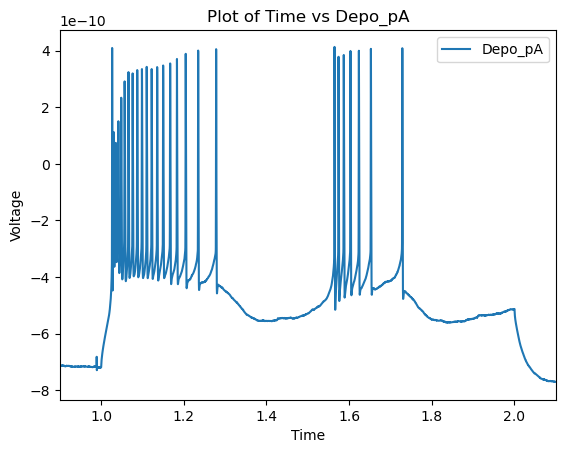

In [20]:
# Plot the data
plt.plot(time, depo_pA, label='Depo_pA')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Plot of Time vs Depo_pA')
plt.xlim(.9,2.1)
# Add legend
plt.legend()

# Show the plot
plt.show()

Heck YEAH! I did that experiment! 

So lets write sum stuff to get at our pertinant data beginning with the number of action potentials. Keep in mind that once a cells membrane potential (voltage) goes above 0, we can call that an action potential. 

In [21]:
# Set the threshold
threshold = 0

# Define the time range (between 1 and 2 seconds)
start_time = 1
end_time = 2

# Find the indices within the specified time range
time_indices = np.where((time >= start_time) & (time <= end_time))[0]

In [22]:
# Initialize a counter for the occurrences
occurrences = 0

# Iterate over the indices and count occurrences
in_spike = False
for idx in time_indices:
    if depo_pA[idx] > threshold and not in_spike:
        # Entering a spike event
        in_spike = True
        occurrences += 1
    elif depo_pA[idx] <= threshold and in_spike:
        # Exiting a spike event
        in_spike = False

# Print the result
print(f"Number of spike events between {start_time} and {end_time} seconds: {occurrences}")

Number of spike events between 1 and 2 seconds: 26


For good measure, lets make sure that is actually picking up each AP. 

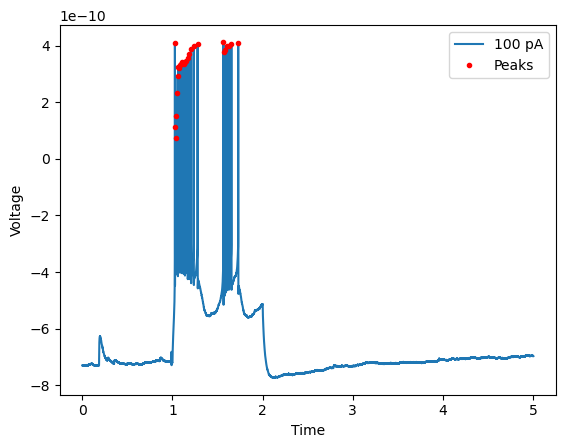

In [23]:
peaks, _ = find_peaks(depo_pA, height=threshold)

# Plot the data with peaks
plt.plot(time, depo_pA, label='100 pA')
plt.plot(time[peaks], depo_pA[peaks], 'r.', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()
plt.show()


## Exercise - Zoom in to stimuluation time

Plot the data zoomed in only over the 1-sec stimulation period

(1.0, 2.0)

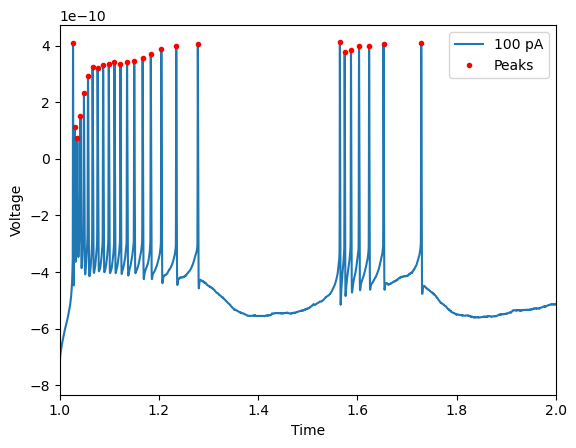

In [24]:
# Answer

# Plot the data with peaks
plt.plot(time, depo_pA, label='100 pA')
plt.plot(time[peaks], depo_pA[peaks], 'r.', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()
plt.xlim(1,2)

##**DRUM SOLO**## FUCK YEAH! 

Great! Now let's look at how long it took for the first spike to occur in relation to the start of the depolarizing step. 

In [25]:
# Find the first index where depo_pA exceeds the threshold
above_threshold_indices = np.where(depo_pA > threshold)[0]

if above_threshold_indices.size > 0:
    # Get the first index where depo_pA exceeds the threshold
    first_peak_index = above_threshold_indices[0]

    # Calculate the latency to the first peak
    latency_to_first_peak = time[first_peak_index] - start_time
    

    print(f'Latency to the first peak above threshold: {latency_to_first_peak} seconds')
else:
    print('No peak above threshold in the specified time range.')

Latency to the first peak above threshold: 0.026499999999999968 seconds


Gnarly. 

Now we want to look at the Frequency. that is the number of action potentials within the firing range. Its worth noting that while we are deplarizing for 1 second, these cells stop firing before the current step is over (Sometimes..). this is thought to be secondary to sodium channel inactivation Voltage-gated sodium channels open (activate) when the membrane is depolarized and close on repolarization (deactivate) but also on continuing depolarization by a process termed inactivation, which leaves the channel refractory, i.e., unable to open again for a period of time.]

So to calculate the frequency we want to look at the number of events / the time from intiation to Na channel inactivation. 

for the sake of simplicity, lets use the last peak as the end of our analysis

In [26]:
if above_threshold_indices.size > 0:
    # Get the last index where depo_pA exceeds the threshold
    last_peak_index = above_threshold_indices[-1]

    # Calculate the latency to the last peak
    latency_to_last_peak = time[last_peak_index] - start_time

    print(f'Latency to the last peak above threshold: {latency_to_last_peak} seconds')
else:
    print('No peak above threshold in the specified time range.')

Latency to the last peak above threshold: 0.7293000000000001 seconds


In [27]:
Frequency = occurrences/latency_to_last_peak 
Frequency

35.650623885918

We are doing great yall, last thing we want to do is calculae the interspike interval. that is, the time between each action potential 

In [28]:
# Calculate inter-spike intervals
inter_spike_intervals = np.diff(time[peaks])
inter_spike_intervals

array([0.0038, 0.0049, 0.0063, 0.007 , 0.0082, 0.0093, 0.0101, 0.0111,
       0.0114, 0.0115, 0.012 , 0.0133, 0.0145, 0.0169, 0.0165, 0.0212,
       0.0301, 0.0435, 0.2864, 0.0097, 0.0127, 0.0162, 0.0203, 0.0291,
       0.076 ])

Beautiful! Now we can put it all together can make it do all of that for all of my Data :D but again, this work wasnt done with coding in mind. 

to do this, we are going to be taking advantage of the os.walk function! this allows us to iterate through folders and subfolders and grab/analyze all pertinent information! 

First some info on how the data is oragnaized.

Data exists as txt files (.agxt) in the folder [Data]. this folder has two more folders repesenting two treatment groups [Naive, MTA]. each folder has TWO MORE subfolders [Morphine, NLX]. So we want to record all the data and give them the label of what folder/subfolder it is being analyzed from.  

first we need to tell it where we are getting out data from. 

In [29]:
# Specify the top-level folder path ('Data' folder)
top_folder_path = 'Data' 

So to start lets define the columns of data we want to fill 

In [30]:
def analyze_data(top_folder_path):
    # Initialize lists to store results
    file_names = []
    parent_folders = []  
    subfolders = []  
    num_spike_events_list = []
    inter_spike_intervals_list = []
    spike_frequency_list = []
    time_to_last_spike_list = []

Once we set the path for the code to follow we just got to put the code we made above into a for loop and allow it to iterate through all our data. additonally we will want to make it spit all that data into a spreadsheet so I.. i mean we can stop coding and move the data to another software we are aready paying for like prism. 

In [31]:
import os
import numpy as np
from scipy.signal import find_peaks
import pandas as pd

def analyze_data(top_folder_path):
    # Initialize lists to store results
    file_names = []
    parent_folders = []  
    subfolders = []  
    num_spike_events_list = []
    inter_spike_intervals_list = []
    spike_frequency_list = []
    time_to_last_spike_list = []

    count = 0

    # Iterate through all subfolders within the top folder
    for root, dirs, _ in os.walk(top_folder_path):
        # Check if the current subfolder is a 'morphine' or 'NLX' folder
        if os.path.basename(root) in ['Morphine', 'NLX']:
            # Get the parent folder (Naive or MTA)
            parent_folder = os.path.basename(os.path.dirname(root))
            # Get the subfolder (morphine or NLX)
            subfolder = os.path.basename(root)

            # Iterate through all files in the current folder
            for file_name in os.listdir(root):
                if file_name.endswith('.axgt'):
                    # Load data from the file
                    file_path = os.path.join(root, file_name)
                    data = np.loadtxt(file_path, skiprows=1, delimiter='\t')

                    # Extract time and data for analysis
                    time = data[:, 0]
                    experiment_data = data[:, 4]  # Change the column index as needed

                    # Analysis results for: number of spikes/frequency/time to last spike  
                    threshold = 0
                    peaks, _ = find_peaks(experiment_data, height=threshold)

                    num_spike_events = len(peaks)
                    inter_spike_intervals = np.diff(time[peaks])

                    if num_spike_events > 0:
                        spike_frequency = num_spike_events / np.sum(inter_spike_intervals)
                    else:
                        spike_frequency = np.nan

                    onset_time = 1
                    time_to_last_spike = time[peaks[-1]] - onset_time if num_spike_events > 0 else None

                    # Add results to lists
                    file_names.append(file_name)
                    parent_folders.append(parent_folder)  
                    subfolders.append(subfolder)  
                    num_spike_events_list.append(num_spike_events)
                    inter_spike_intervals_list.append(inter_spike_intervals)
                    spike_frequency_list.append(spike_frequency)
                    time_to_last_spike_list.append(time_to_last_spike)

                    count += 1

    # Create a spreadsheet (CSV file) with the results
    output_directory = os.path.join('C:/Users/koita/Downloads/FR-Am/FR', 'output')
    os.makedirs(output_directory, exist_ok=True)

    output_file_path = os.path.join(output_directory, 'analysis_results.csv')

    df = pd.DataFrame({
        'File Name': file_names,
        'Parent Folder': parent_folders,  
        'Subfolder': subfolders,  
        'Number of Spike Events': num_spike_events_list,
        'Inter-Spike Intervals': inter_spike_intervals_list,
        'Spike Frequency (Hz)': spike_frequency_list,
        'Time to Last Spike': time_to_last_spike_list
    })

    df.to_csv(output_file_path, index=False)

    print(f"Results saved to {output_file_path}")
    print(f"Number of times the loop ran: {count}")

# The top-level folder path ('Data' folder)
top_folder_path = 'C:/Users/koita/Downloads/FR-Am/FR/Data'  
analyze_data(top_folder_path)



Results saved to C:/Users/koita/Downloads/FR-Am/FR/output/analysis_results.csv
Number of times the loop ran: 0


If we are left doing the rest of the analysis on python, the next step will be going into the newly developed data files and pulling out the relevant information